# Covid19 Vaccines A/B Testing
---

Github: [Covid19 Vaccines A/B Testing](https://github.com/bassamfaramawi/Covid19-Vaccines-A-B-Testing)

​
Kaggle: [Covid19 Vaccines A/B Testing](https://www.kaggle.com/tiodaronzi3/covid19-vaccines-a-b-testing)
​

Auther: Bassam Faramawi
​
---
​
## Table of Contents
- [Dataset](#dataset)
- [Objective](#objective)
- [Hypotheses](#hypotheses)
- [Conclusion](#conclusion)

​
​
<a id='dataset'></a>
# Dataset
​
The Vaccine Adverse Event Reporting System (VAERS) was created by the Food and Drug Administration (FDA) and Centers for Disease Control and Prevention (CDC) to receive reports about adverse events that may be associated with vaccines. No prescription drug or biological product, such as a vaccine, is completely free from side effects. Vaccines protect many people from dangerous illnesses, but vaccines, like drugs, can cause side effects, a small percentage of which may be serious. VAERS is used to continually monitor reports to determine whether any vaccine or vaccine lot has a higher than expected rate of events.

Dataset [here](https://www.kaggle.com/datasets/ayushggarg/covid19-vaccine-adverse-reactions).
​
<a id='objective'></a>
# Objective
​
For this project, I will be working to draw conclusions about statistical significance of deaths ossociated with both Moderna and Pfizer vaccines on average, assuming that all the reported deaths of VAERS are due to Covid19. 

VAERS dataset represents our sample of the entire population. 

A/B tests are very commonly performed by data analysts and data scientists.
​

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-vaccine-adverse-reactions/2021VAERSVAX.csv
/kaggle/input/covid19-vaccine-adverse-reactions/2021VAERSSYMPTOMS.csv
/kaggle/input/covid19-vaccine-adverse-reactions/2021VAERSDATA.csv


In [2]:
data = pd.read_csv('../input/covid19-vaccine-adverse-reactions/2021VAERSDATA.csv', encoding='windows-1254')
pd.set_option('display.max_columns', None)
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [3]:
data = data[['VAERS_ID', 'DIED']]
data.head()

,VAERS_ID,DIED
0,916600,NaN
1,916601,NaN
2,916602,NaN
3,916603,NaN
4,916604,NaN


In [4]:
#convert DIED col into intger with 0,1 instead of N,Y
data = data.replace({'DIED': {'Y':1}}).fillna({'DIED':0})
data['DIED'].value_counts()

0.0    32164
1.0     1957
Name: DIED, dtype: int64

In [5]:
vax = pd.read_csv('../input/covid19-vaccine-adverse-reactions/2021VAERSVAX.csv')
vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [6]:
vax = vax[['VAERS_ID', 'VAX_MANU']]
vax.head()

,VAERS_ID,VAX_MANU
0,916600,MODERNA
1,916601,MODERNA
2,916602,PFIZER\BIONTECH
3,916603,MODERNA
4,916604,MODERNA


In [7]:
#Join the two dataframes
vax_died = data.merge(vax, how='left')
vax_died.head()

,VAERS_ID,DIED,VAX_MANU
0,916600,0.0,MODERNA
1,916601,0.0,MODERNA
2,916602,0.0,PFIZER\BIONTECH
3,916603,0.0,MODERNA
4,916604,0.0,MODERNA


In [8]:
vax_died.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34630 entries, 0 to 34629
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VAERS_ID  34630 non-null  int64  
 1   DIED      34630 non-null  float64
 2   VAX_MANU  34630 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
vax_died.VAX_MANU.value_counts()

PFIZER\BIONTECH                      16534
MODERNA                              16513
JANSSEN                               1109
UNKNOWN MANUFACTURER                   194
MERCK & CO. INC.                       105
GLAXOSMITHKLINE BIOLOGICALS             77
SANOFI PASTEUR                          54
SEQIRUS, INC.                           14
PFIZER\WYETH                            12
PROTEIN SCIENCES CORPORATION             8
NOVARTIS VACCINES AND DIAGNOSTICS        6
EMERGENT BIOSOLUTIONS                    1
DYNAVAX TECHNOLOGIES CORPORATION         1
MEDIMMUNE VACCINES, INC.                 1
BERNA BIOTECH, LTD.                      1
Name: VAX_MANU, dtype: int64

<a id='hypotheses'></a>
# Hypotheses



**Null:          $avg_{moderna}$ - $avg_{pfizer}$  <=  0**

**Alternative:   $avg_{moderna}$ - $avg_{pfizer}$  > 0**

In [14]:
mod_died_mean = vax_died.query('VAX_MANU == "MODERNA"')['DIED'].mean()
pfz_died_mean = vax_died.query('VAX_MANU == "PFIZER\BIONTECH"')['DIED'].mean()
mod_died_mean, pfz_died_mean

(0.061224489795918366, 0.05655013910729406)

In [15]:
diff = mod_died_mean - pfz_died_mean
diff

0.004674350688624304

In [16]:
#bootstap sampling distribution
diffs = []
for _ in range(int(1e4)):
    sample = vax_died.sample(200, replace=True)
    mod_mean = sample.query('VAX_MANU == "MODERNA"')['DIED'].mean()
    pfz_mean = sample.query('VAX_MANU == "PFIZER\BIONTECH"')['DIED'].mean()
    diffs.append(mod_mean - pfz_mean)

diffs = np.array(diffs)

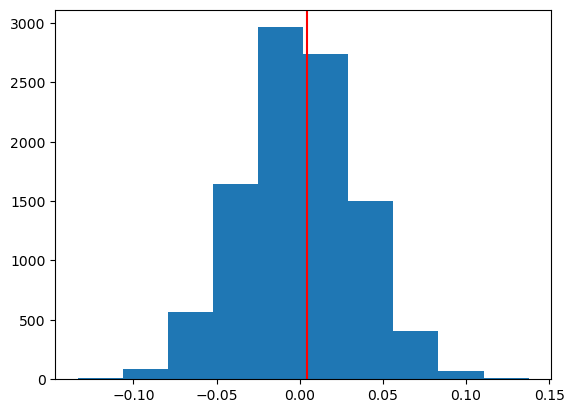

In [17]:
#generate null hypothesis normal distribution
nul_vals = np.random.normal(0, diffs.std(), 10000)
plt.hist(nul_vals)
plt.axvline(means_diff, color='red');

In [18]:
#calculate P_value more extreme in favor of relative hypothesis
p_val = (nul_vals>means_diff).mean()
p_val

0.4453

**Assuming our Type I error threshold is 5% percentage which is less than calculated P_value, this suggests that we fail to reject the null hypothesis.**

<a id='conclusion'></a>
# Conclusion

We have the statistical significance that average deaths due to Covid19 associated with Pfizer vaccines are higher than average deaths due to Covid19 associated with Moderna vaccines.